<div style="line-height:0.45">
<h1 style="color:#E74C3C"> Data preprocessing 2 </h1>
</div>

<h3 style="color:lightblue"> Keywords: </h3> Pipeline + StandardScaler + QuantileTransformer + PolynomialFeatures + FunctionTransformer

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PolynomialFeatures, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

In [4]:
df = pd.read_csv("./raw_dataset_1_for_preproc_2.csv")

In [5]:
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [6]:
X = df[['x', 'y']].values
y = df['z'] == "a"

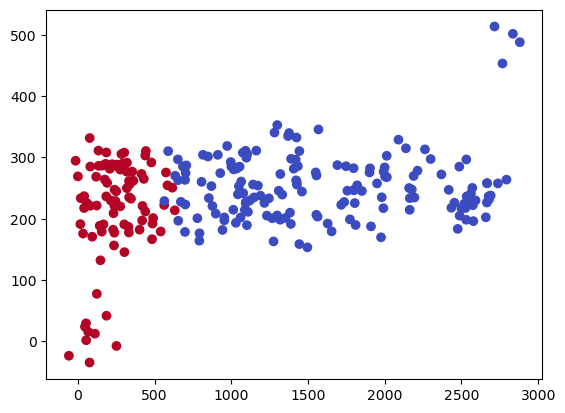

In [7]:
cmaps1 = 'coolwarm'
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmaps1);

<div style="line-height:0.5">
<h3 style="color:#E74C3C"> => Standard Scaler </h3>
</div>

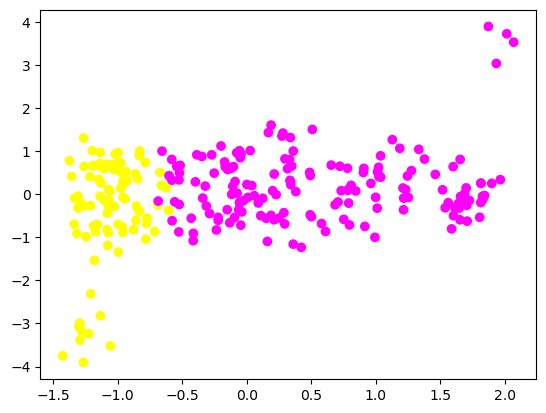

In [8]:
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap='spring');

<div style="line-height:0.5">
<h3 style="color:#E74C3C"> => Quantile Transformer</h3>
</div>

Robust method: <br>
It transforms the features using quantiles information to follow a uniform or a normal distribution. <br>
For a given feature (independently) this (non-linear) transformation tends to spread out the most frequent values. <br>
=> Reduces the impact of outliers <br>

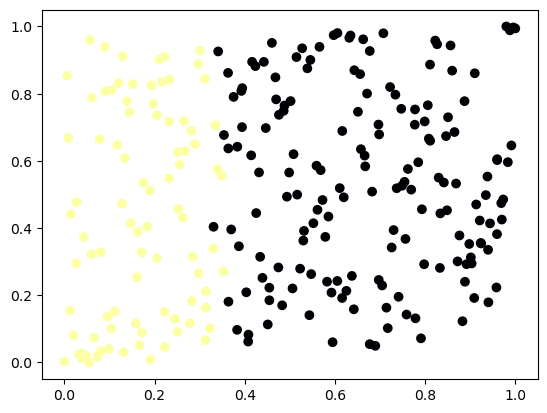

In [9]:
""" QuantileTransformer """
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y,cmap='inferno');

In [10]:
def plot_output(scaler):
    """ Plot the results of a classification model after scaling input data.\\
    It creates three subplots to visualize the original data, transformed data\\
    after scaling, and predicted data using a K-Nearest Neighbors classifier with distance\\
    weighting.

    Parameters:
        Scikit-Learn feature scaling transformer (e.g., StandardScaler, MinMaxScaler, etc.)

    """
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)

    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

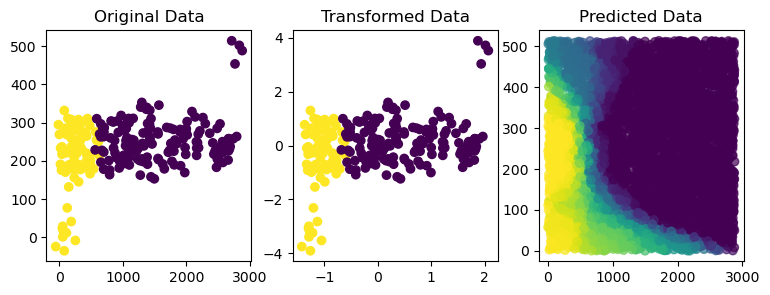

In [11]:
plot_output(scaler=StandardScaler())

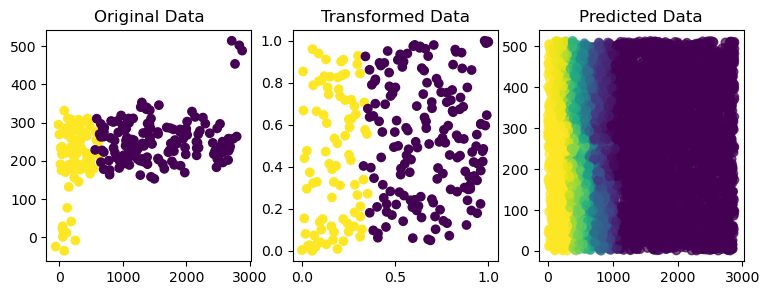

In [12]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

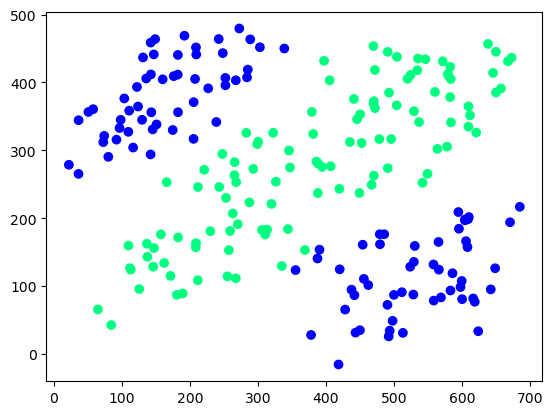

In [13]:
df = pd.read_csv("./raw_dataset_2_for_preproc_2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter');

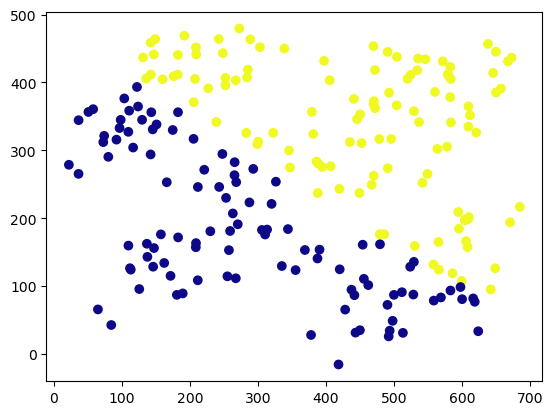

In [14]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='plasma');

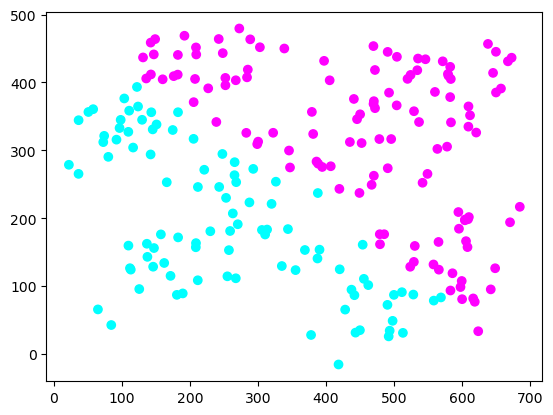

In [15]:
pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=200)), #default n_quantiles=1000 that cannot be greater than num_samples
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='cool')
plt.show()

<div style="line-height:0.5">
<h3 style="color:#E74C3C"> => Polynomial Features </h3>
</div>

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or \
equal to the specified degree. 

N.B.
This can lead to an exponential growth can lead to an explosion in the number of features => Overfitting!

In [24]:
poly = PolynomialFeatures(
    degree=3,                # Specify the degree of polynomial features (e.g., 3 for cubic)
    interaction_only=False,  # Produce only interaction features (cross-products)
    include_bias=True,       # Include a constant feature (bias)
    order='C'                # Order of output features ('C' for C-style, 'F' for Fortran-style)
)

# Transform the original dataset using PolynomialFeatures
X_poly = poly.fit_transform(X)

print("Partial original dataset:")
print(X[:10])
print("\nPartial Transformed dataset with PolynomialFeatures:")
print(X_poly[:10])

Partial original dataset:
[[469.75935457 453.57494625]
 [535.33181903 435.22184845]
 [504.28552614 437.76757842]
 [469.89139807 368.37165156]
 [405.42562163 403.14154552]
 [397.20012989 431.814503  ]
 [450.17444386 353.00499964]
 [322.32678937 325.76581871]
 [379.25993898 356.56261747]
 [300.24926412 312.70401394]]

Partial Transformed dataset with PolynomialFeatures:
[[1.00000000e+00 4.69759355e+02 4.53574946e+02 2.20673851e+05
  2.13071074e+05 2.05730232e+05 1.03663606e+08 1.00092130e+08
  9.66437009e+07 9.33140789e+07]
 [1.00000000e+00 5.35331819e+02 4.35221848e+02 2.86580156e+05
  2.32988104e+05 1.89418057e+05 1.53415476e+08 1.24725945e+08
  1.01401513e+08 8.24388771e+07]
 [1.00000000e+00 5.04285526e+02 4.37767578e+02 2.54303892e+05
  2.20759854e+05 1.91640453e+05 1.28241772e+08 1.11325999e+08
  9.66415065e+07 8.38939769e+07]
 [1.00000000e+00 4.69891398e+02 3.68371652e+02 2.20797926e+05
  1.73094670e+05 1.35697674e+05 1.03751046e+08 8.13356967e+07
  6.37631696e+07 4.99871762e+07]
 

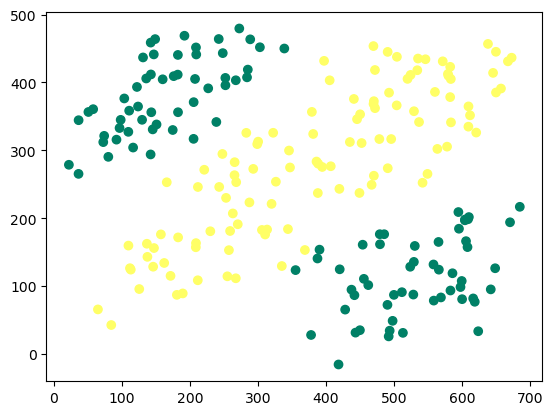

In [16]:
""" Polynomial features: X1*X2, X1^2, X2^2  """
pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='summer'); 

<div style="line-height:0.5">
<h3 style="color:#E74C3C"> => FunctionTransformer</h3>
</div>

Transformer built from an arbitrary callable. <br>
It forwards X (and optionally y) arguments to a user-defined function and returns the results.<br>
- Useful for stateless transformations (logging)
- When using lambda is used function, then the resulting transformer will not be pickleable.

In [17]:
###### Custom transformations
def divid(X):
    """ Divide by the maximum value in each column """
    return X / np.max(X, axis=0)

def oneho(X):
    """ Perform one-hot encoding on categorical values """
    encoder = OneHotEncoder()
    return encoder.fit_transform(X).toarray()

In [25]:
# Datasets 
X[:4], y[:4]

(array([[469.75935457, 453.57494625],
        [535.33181903, 435.22184845],
        [504.28552614, 437.76757842],
        [469.89139807, 368.37165156]]),
 0    True
 1    True
 2    True
 3    True
 Name: z, dtype: bool)

In [22]:
type(X), X.size, y.size

(numpy.ndarray, 434, 217)

In [26]:
## Determine numerical and categorical columns based on data type
num_cols = [i for i in range(X.shape[1]) if np.issubdtype(X[:, i].dtype, np.number)]
cat_cols = [i for i in range(X.shape[1]) if i not in num_cols]

## Create transformers 
num_transformer = FunctionTransformer(func=divid)
cat_transformer = FunctionTransformer(func=oneho)

##### Create a column transformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [31]:
#### Create a pipeline for preprocessing
pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

# Fit and transform the data using the pipeline
X_preprocessed = pipeline.fit_transform(X)
print("X_preprocessed with custom transformations:\n")
print(X_preprocessed[:10])

X_preprocessed with custom transformations:

[[0.68580476 0.94586461]
 [0.78153443 0.90759189]
 [0.73620975 0.91290064]
 [0.68599753 0.76818552]
 [0.59188352 0.84069308]
 [0.57987508 0.90048637]
 [0.65721262 0.73614061]
 [0.47056699 0.67933725]
 [0.55368407 0.7435595 ]
 [0.43833587 0.65209876]]
